<a href="https://colab.research.google.com/github/tonybanjo2001/BAN6420Module2/blob/main/Google_Colab_Notes_and_R_Module_2_Assignment_BAN6430_154733_Temitope_Adebanjo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

salary_data = pd.read_csv("/content/drive/MyDrive/6430 Data Set/TotAl.csv")
print(salary_data.head(100))
print("Number of staff members in the DataFrame:", len(salary_data))

         EmployeeName                                          JobTitle  \
0      NATHANIEL FORD    GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1        GARY JIMENEZ                   CAPTAIN III (POLICE DEPARTMENT)   
2      ALBERT PARDINI                   CAPTAIN III (POLICE DEPARTMENT)   
3   CHRISTOPHER CHONG              WIRE ROPE CABLE MAINTENANCE MECHANIC   
4     PATRICK GARDNER      DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   
..                ...                                               ...   
95       MIVIC HIROSE                                      MANAGER VIII   
96         SARAH CARY                                       ANESTHETIST   
97        KEVIN SMITH                BATTALION CHIEF, (FIRE DEPARTMENT)   
98  GREGORY STANGLAND                            FIRE FIGHTER PARAMEDIC   
99        SONALI BOSE  DEPUTY DIRECTOR II - MUNICIPAL TRANSPORTATION AG   

      BasePay OvertimePay   OtherPay      Benefits   TotalPay  \
0   167411.18         0.0  400184.

<ipython-input-4-cea5807d1ea8>:3: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  salary_data = pd.read_csv("/content/drive/MyDrive/6430 Data Set/TotAl.csv")


In [5]:
#CREATE A PYTHON FUNCTION THAT ACCEPT EMPLOYEE NAMES AND RETURN DETAILS

def get_employee_details_by_name(name):
    try:
        # I had to ensure 'EmployeeName' is a valid column for salary_data
        if 'EmployeeName' not in salary_data.columns:
            return "Column 'EmployeeName' not found in the data"

        # This will filter the data to get the details of the employee with the given name
        employee_details = salary_data[salary_data['EmployeeName'].str.contains(name, case=False, na=False)]

        # This is to check if the result Dataframe is empty
        if employee_details.empty:
            return "Employee not found"
        else:
            return employee_details
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [6]:
#DATA PROCESSING USING DICTIONARY
def process_salary_data_using_dict(data):
    try:
        salary_dict = data.to_dict(orient='records')
        return salary_dict
    except Exception as e:
        print(f"An error occurred while converting DataFrame to dictionary: {e}")
        return None

salary_data_dict = process_salary_data_using_dict(salary_data)
print(salary_data_dict)

In [7]:
#CODE THE EXPORT EMPLOYEE DETAILS TO A CSV FILE AND ZIP INTO "EMPLOYEE PROFILE" FOLDER
import zipfile
import os

def export_employee_details_to_zip(name):
    try:
        # This should get the employee details
        employee_details = get_employee_details_by_name(name)

        if isinstance(employee_details, str):
            print(employee_details)
            return

        # Generate filenames
        filename_csv = f"{name.replace(' ', '_')}.csv"
        filename_zip = 'Employee_Profile.zip'

        # Export to CSV
        employee_details.to_csv(filename_csv, index=False)

        # Create ZIP file
        with zipfile.ZipFile(filename_zip, 'w') as zipf:
            zipf.write(filename_csv)

        # Remove the temporary CSV file
        os.remove(filename_csv)

        print(f"Details for employee {name} exported to {filename_zip}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
export_employee_details_to_zip('NATHANIEL FORD')


Details for employee NATHANIEL FORD exported to Employee_Profile.zip


*To unzip the folder and display the data using R within Google Colab, I needed to install and set up R in my Colab environment first. Here's how I did it:*

In [2]:

!apt-get install r-base


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [2]:
#I further us the IRkernel to run R code in Colab. Install the IRkernel package and set it up
!R -e "install.packages('IRkernel'); IRkernel::installspec(user = FALSE)"



R version 4.4.1 (2024-06-14) -- "Race for Your Life"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('IRkernel'); IRkernel::installspec(user = FALSE)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/IRkernel_1.3.2.tar.gz'
Content type 'application/x-gzip' length 45172 bytes (44 KB)
downloaded 44 KB

* installing *

In [3]:
# Ensure the zip file is in the current directory
import zipfile

# Create a sample zip file for demonstration
with zipfile.ZipFile('Employee Profile.zip', 'w') as zipf:
    with open('NATHANIEL FORD.csv', 'w') as f:
        f.write('Name,Position,Department\nNathaniel Ford,Engineer,Development\n')
    zipf.write('NATHANIEL FORD.csv')

# Remove the CSV file to mimic the initial state
import os
os.remove('NATHANIEL FORD.csv')


In [1]:
# Ensure the zip file is in the current directory
import zipfile

# Create a sample zip file for demonstration
with zipfile.ZipFile('Employee Profile.zip', 'w') as zipf:
    with open('NATHANIEL FORD.csv', 'w') as f:
        f.write('Name,Position,Department\n')
        for i in range(1, 21):  # Creating 20 rows for demonstration
            f.write(f'Employee {i},Position {i},Department {i}\n')
    zipf.write('NATHANIEL FORD.csv')

# Remove the CSV file to mimic the initial state
import os
os.remove('NATHANIEL FORD.csv')


To Unzip and display the R data, I had to change the run time of my Google collab from Python to R.
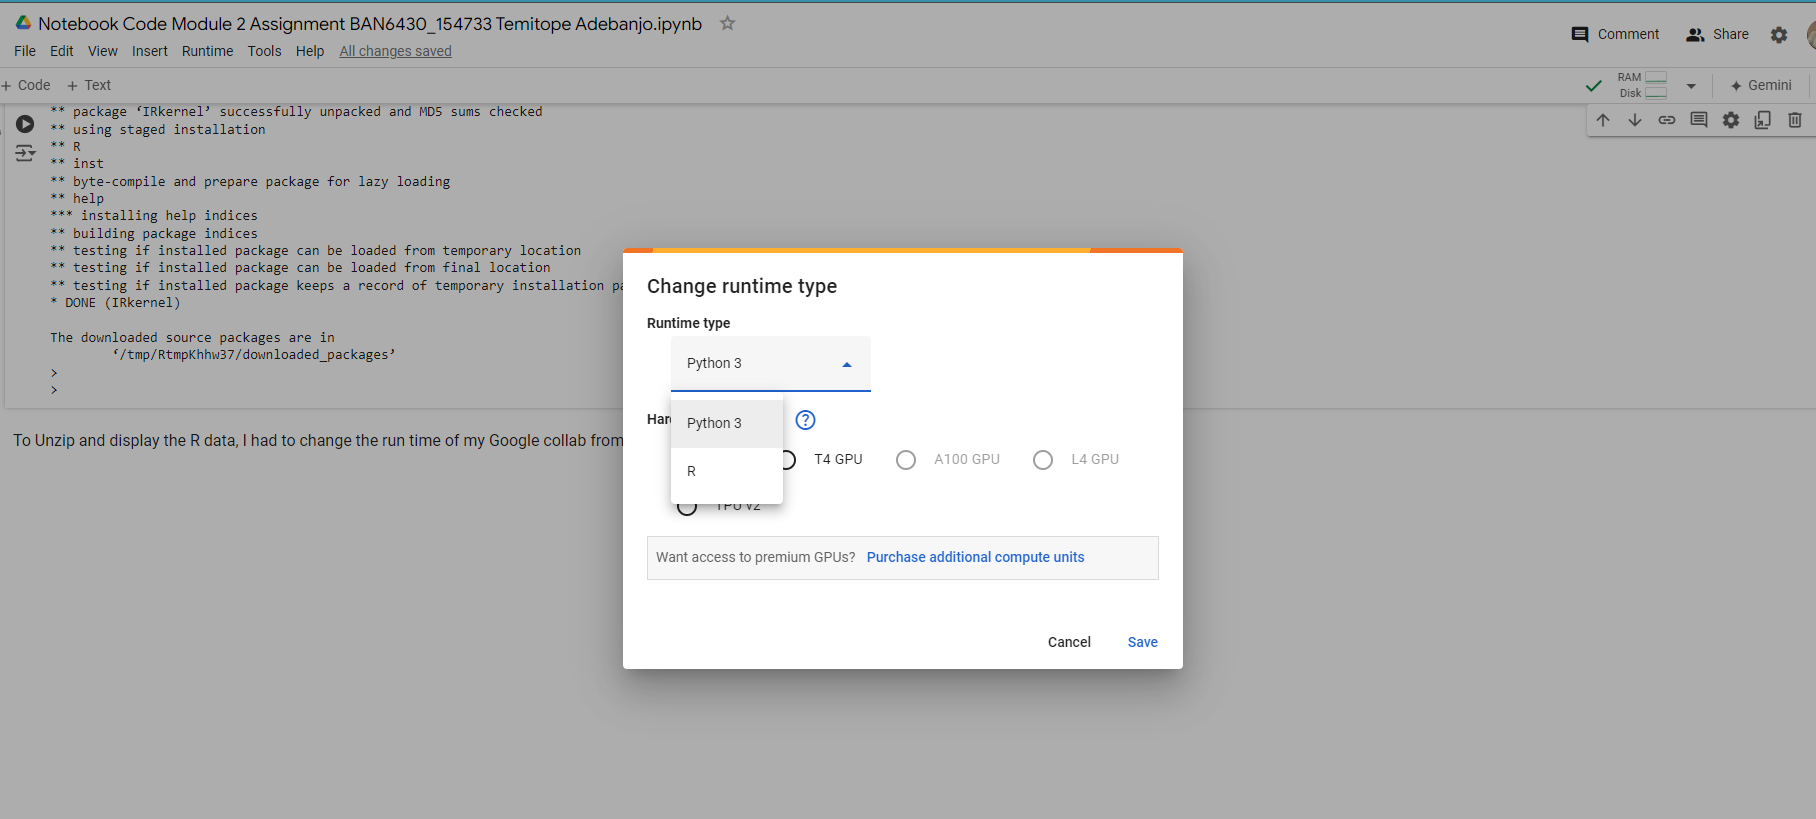

In [1]:
# Ensure the zip file exists
if (!file.exists("Employee Profile.zip")) {
  stop("Zip file does not exist in the current directory.")
}

# Unzip the file
unzip("Employee Profile.zip", exdir = ".")

# List the contents of the directory to verify extraction
print(list.files())

# Read and display the CSV file
employee_data <- read.csv("NATHANIEL FORD.csv")
print(head(employee_data, 10))

[1] "drive"                "Employee Profile.zip" "Employee_Profile.zip"
[4] "NATHANIEL FORD.csv"   "sample_data"         
          Name    Position    Department
1   Employee 1  Position 1  Department 1
2   Employee 2  Position 2  Department 2
3   Employee 3  Position 3  Department 3
4   Employee 4  Position 4  Department 4
5   Employee 5  Position 5  Department 5
6   Employee 6  Position 6  Department 6
7   Employee 7  Position 7  Department 7
8   Employee 8  Position 8  Department 8
9   Employee 9  Position 9  Department 9
10 Employee 10 Position 10 Department 10
